In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Charger les données
df = pd.read_csv("winequality-white.csv", sep=";")


In [17]:
# Le nombre de lignes
print(len(df))

4898


In [14]:
# Examiner les données
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [15]:
# Vérifier les valeurs nulls
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [16]:
# Affichez le nombre total de valeurs uniques dans chaque colonne
valeurs_uniques_totales = df.nunique()
print("Nombre total de valeurs uniques par colonne :\n", valeurs_uniques_totales)


Nombre total de valeurs uniques par colonne :
 fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64


In [55]:
# Examiner le résumé statistique des fonctionnalités
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4827 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4827 non-null   float64
 1   volatile acidity      4827 non-null   float64
 2   citric acid           4827 non-null   float64
 3   residual sugar        4827 non-null   float64
 4   chlorides             4827 non-null   float64
 5   free sulfur dioxide   4827 non-null   float64
 6   total sulfur dioxide  4827 non-null   float64
 7   density               4827 non-null   float64
 8   pH                    4827 non-null   float64
 9   sulphates             4827 non-null   float64
 10  alcohol               4827 non-null   float64
 11  quality               4827 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 490.2 KB


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4827.000000       4827.000000  4827.000000     4827.000000   
mean        6.854413          0.277890     0.334247        6.341869   
std         0.839355          0.100094     0.120276        4.948729   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.800000   
max        14.200000          1.100000     1.660000       22.000000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4827.000000          4827.000000           4827.000000  4827.000000   
mean      0.045762            34.640046            137.505904     0.993995   
std       0.021937            15.374054             41.194880     0.002891   
min       0.009000             2.000000             21.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991700   
50%       0.043000            33.000000            134.000000     0.993700   
75%       0.050000            45.000000            166.000000     0.996070   
max       0.346000            80.000000            255.000000     1.001960   

                pH    sulphates      alcohol      quality  
count  4827.000000  4827.000000  4827.000000  4827.000000  
mean      3.188519     0.489358    10.518931     5.883364  
std       0.150804     0.113359     1.229996     0.879303  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

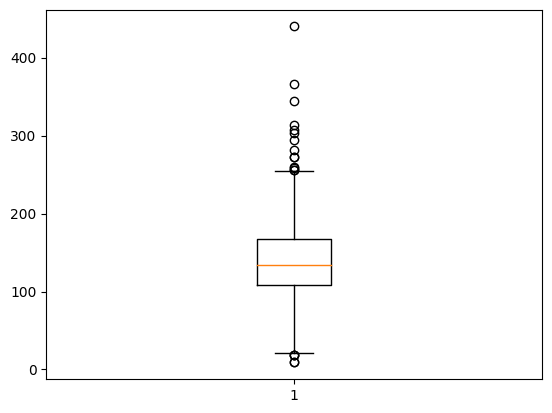

In [21]:
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["total sulfur dioxide"])
plt.show()


In [26]:
# Calculez l'IQR pour la fonction "dioxyde de soufre total"
Q1 = df["total sulfur dioxide"].quantile(0.25)
Q3 = df["total sulfur dioxide"].quantile(0.75)
IQR = Q3 - Q1

In [31]:
# Supprimer les données aberrantes
df = df[~((df["total sulfur dioxide"] < (Q1 - 1.5 * IQR)) | (df["total sulfur dioxide"] > (Q3 + 1.5 * IQR)))]

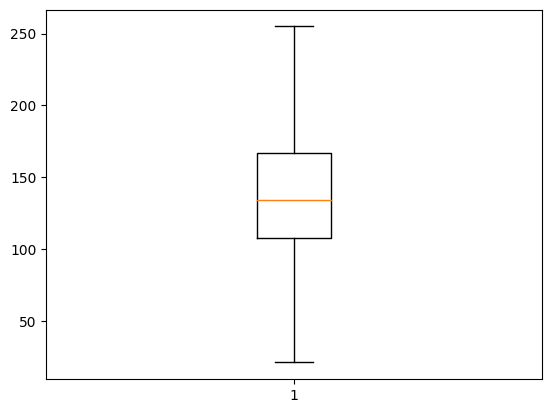

In [33]:
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["total sulfur dioxide"])
plt.show()


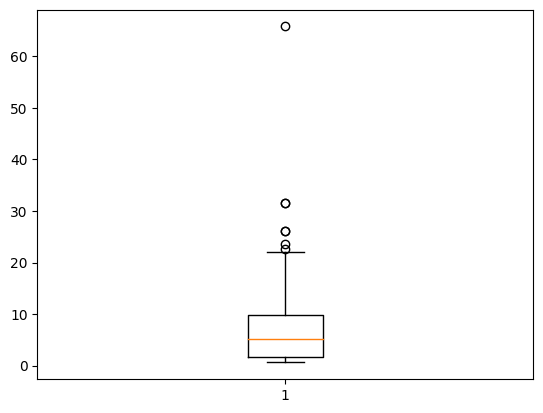

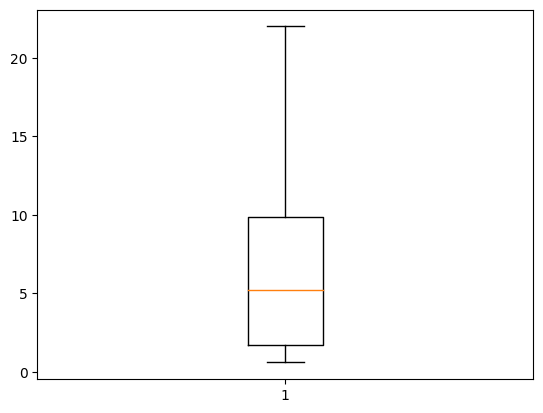

In [37]:
# Supprimer les données aberrantes
# residual sugar
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["residual sugar"])
plt.show()
# Calculez l'IQR pour la fonction "dioxyde de soufre total"
Q1 = df["residual sugar"].quantile(0.25)
Q3 = df["residual sugar"].quantile(0.75)
IQR = Q3 - Q1
# Supprimer les données aberrantes
df = df[~((df["residual sugar"] < (Q1 - 1.5 * IQR)) | (df["residual sugar"] > (Q3 + 1.5 * IQR)))]
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["residual sugar"])
plt.show()

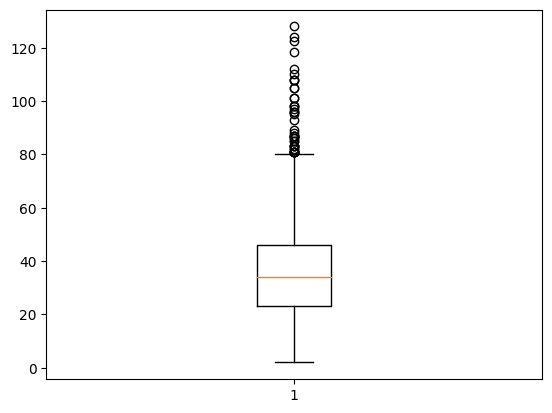

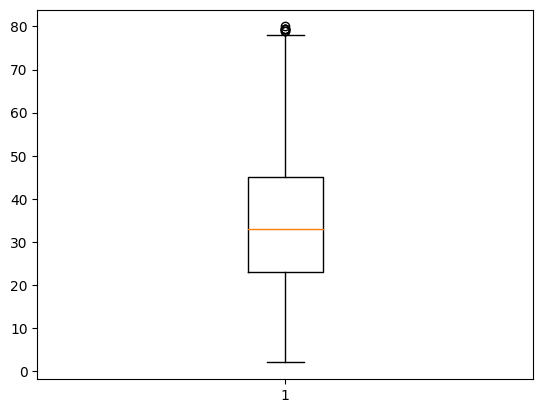

In [39]:
# Supprimer les données aberrantes
# free sulfur dioxide
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["free sulfur dioxide"])
plt.show()
# Calculez l'IQR pour la fonction "dioxyde de soufre total"
Q1 = df["free sulfur dioxide"].quantile(0.25)
Q3 = df["free sulfur dioxide"].quantile(0.75)
IQR = Q3 - Q1
# Supprimer les données aberrantes
df = df[~((df["free sulfur dioxide"] < (Q1 - 1.5 * IQR)) | (df["free sulfur dioxide"] > (Q3 + 1.5 * IQR)))]
# Créer une boîte à moustaches de la fonction "dioxyde de soufre total"
plt.boxplot(df["free sulfur dioxide"])
plt.show()

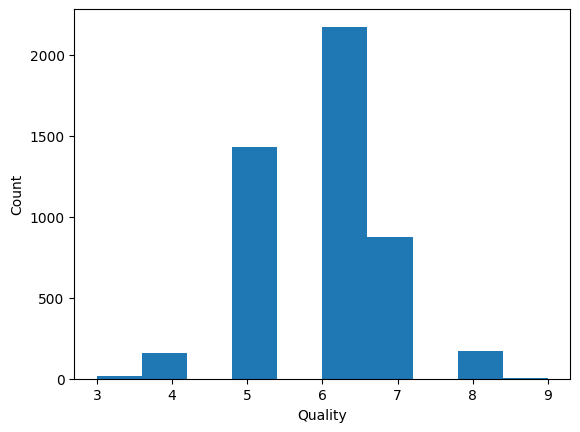

In [51]:
# Créer un histogramme de la variable cible
plt.hist(df["quality"])
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()


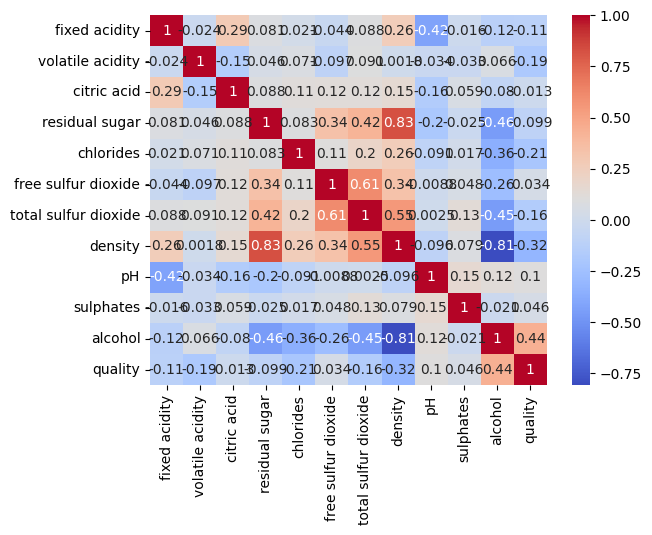

In [44]:
# Créer une carte thermique de la corrélation entre les fonctionnalités
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [46]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

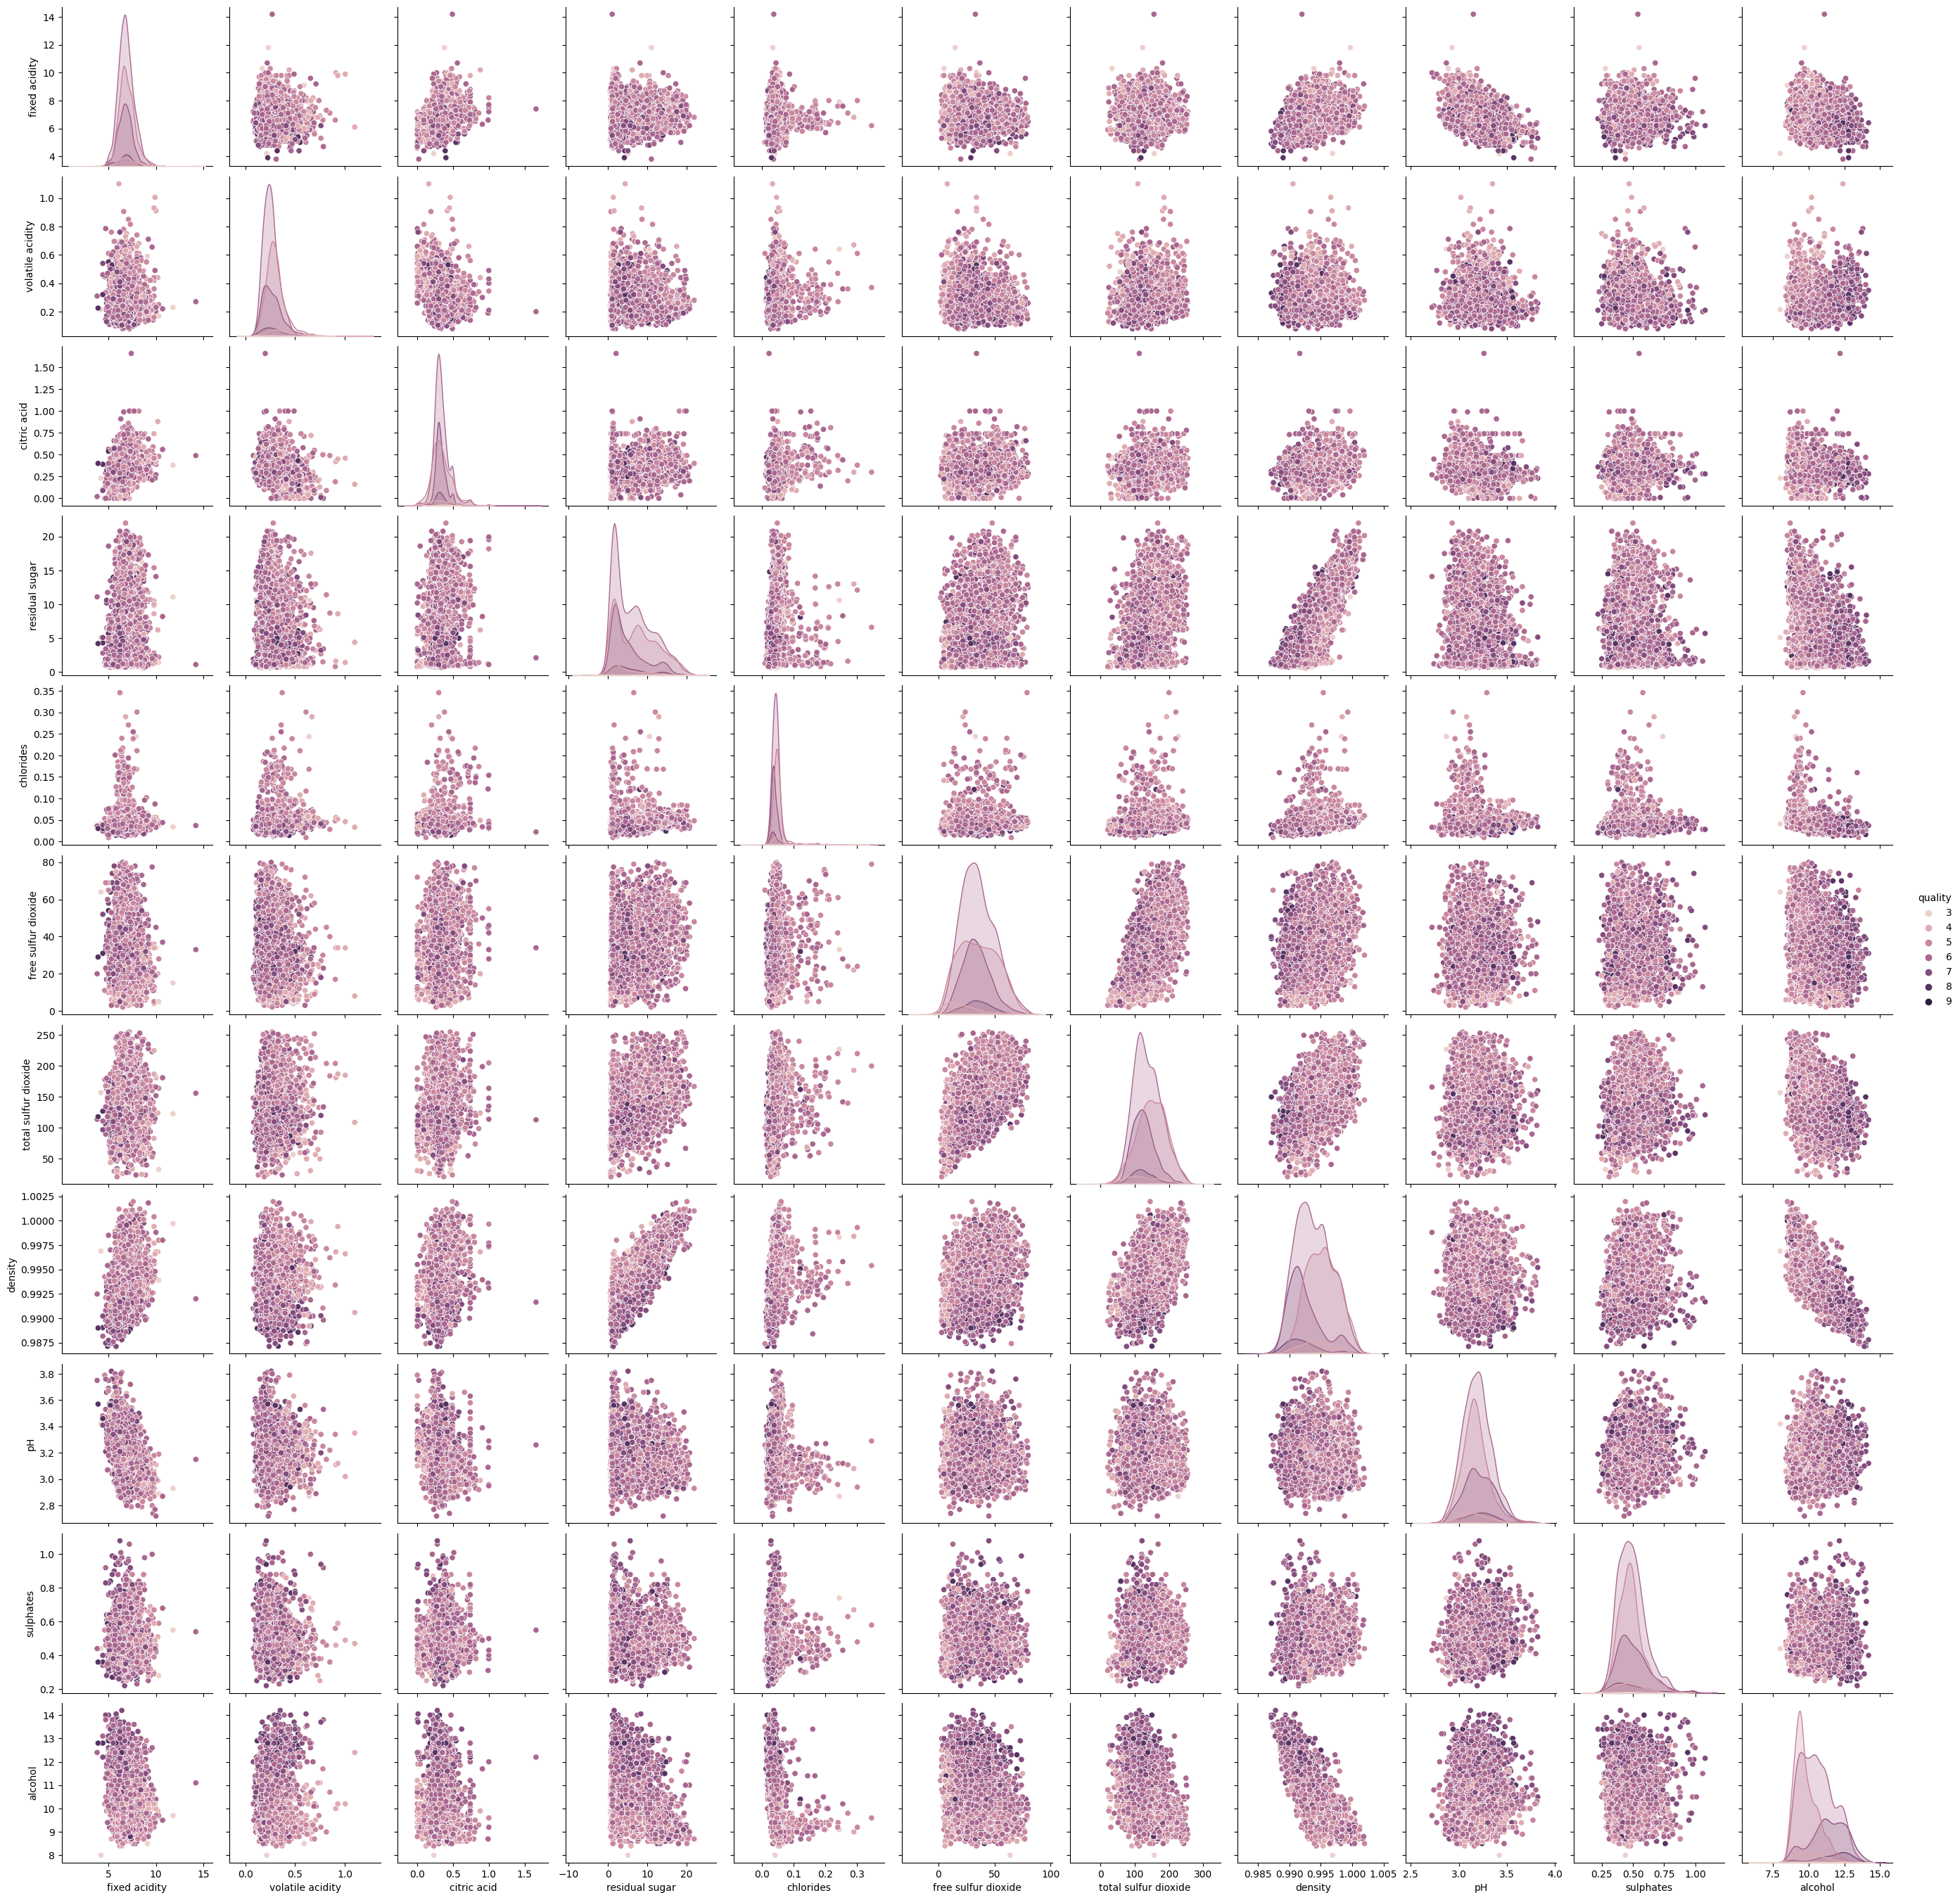

In [49]:
# Créer une matrice de nuages de points
sns.pairplot(data=df, vars=["fixed acidity", "volatile acidity",
                            "citric acid", "residual sugar", "chlorides",
                            "free sulfur dioxide", "total sulfur dioxide",
                            "density" , "pH", "sulphates", "alcohol"], hue="quality")


In [52]:
valeurs_uniques = df['quality'].unique()


In [53]:
valeurs_uniques

array([6, 5, 7, 8, 4, 3, 9])

In [56]:
column_counts = df['quality'].value_counts()
column_counts

6    2172
5    1431
7     875
8     170
4     160
3      14
9       5
Name: quality, dtype: int64

In [ ]:
# Modele Training


In [57]:
# 1. Stanndarize the quality column

x = df.drop('quality', axis=1)

y = df['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
4893    0
4894    0
4895    0
4896    1
4897    0
Name: quality, Length: 4827, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [60]:
print(y.shape, y_train.shape, y_test.shape)

(4827,) (3861,) (966,)


In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [62]:
model.fit(x_train, y_train)


RandomForestClassifier()

In [64]:
from sklearn.metrics import accuracy_score

x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

accuracy_rf = test_data_accuracy*100
print('Accuracy = ', accuracy_rf)

Accuracy =  89.02691511387164
